In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib notebook
path = '/home/piotr/chmura.put.poznan.pl/Shared/HMI_lab/emg_lab6/'

In [15]:
valid_blank.shape

(1388544, 24)

In [10]:
data=pd.read_hdf('/home/piotr/chmura.put.poznan.pl/Shared/HMI_lab/emg_lab6/test_pre.hdf5')
data.to_hdf(path+'test_preprocessed.hdf5', key = 'a', format='t', complevel=9)

NotImplementedError: Cannot store a category dtype in a HDF5 dataset that uses format="fixed". Use format="table".

<IPython.core.display.Javascript object>


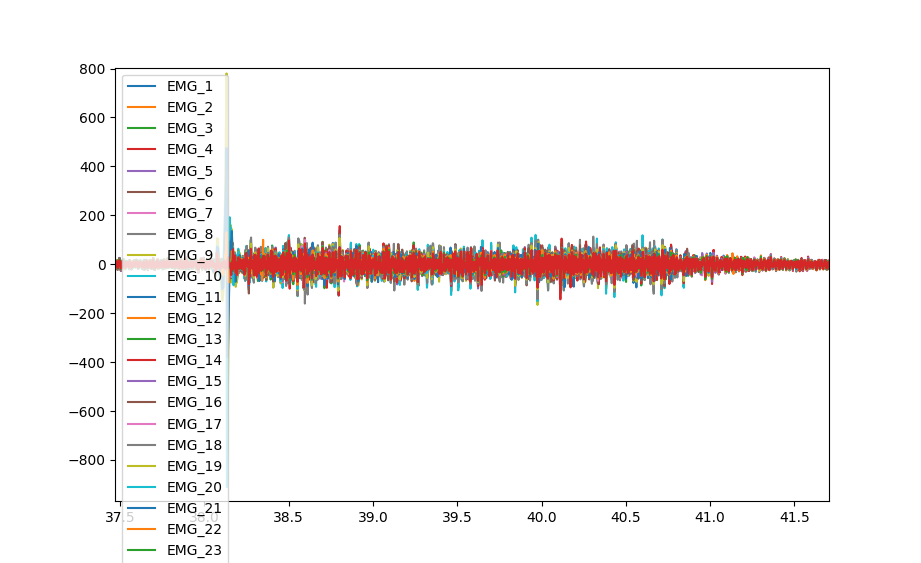

<AxesSubplot:>

In [7]:
data.filter(regex='EMG').plot()

In [8]:
data

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,...,EMG_23,EMG_24,TRAJ_1,type,subject,trajectory,date_time,TRAJ_GT_NO_FILTER,VIDEO_STAMP,TRAJ_GT
-0.068499,-0.945076,-1.215575,-1.075860,-0.995536,-1.093973,-1.084518,-1.166032,-1.160669,-1.159324,-1.048271,...,-1.433592,-1.481250,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918692,-1.0
-0.068304,1.139465,0.175983,-0.354309,0.150918,0.189198,-1.508021,0.157215,0.647828,0.800308,1.444170,...,-1.113855,-1.128490,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918497,-1.0
-0.068109,2.191188,0.629588,-0.383976,0.372572,0.535785,-2.476501,0.671062,1.466714,1.752363,2.795128,...,-1.158837,-1.326146,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918302,-1.0
-0.067913,1.725483,-0.267612,-1.472551,-0.720491,-0.460138,-4.127751,0.002984,0.839021,1.226902,2.415783,...,-1.701100,-2.257115,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918107,-1.0
-0.067718,0.052200,-2.174835,-3.284038,-2.749937,-2.440702,-6.040039,-1.577130,-0.917921,-0.476260,0.542283,...,-2.546374,-3.596899,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.917912,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340.905707,-5.357486,-6.553710,-4.971563,-6.449908,-6.473439,-6.499278,-4.981150,-5.649890,-3.649801,-4.900869,...,-1.503730,-2.356195,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,340.055514,-1.0
340.905902,-5.554633,-6.755505,-5.139075,-6.786338,-6.641987,-6.715266,-5.225293,-6.050513,-3.829578,-4.955872,...,-1.683329,-2.605015,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,340.055709,-1.0
340.906097,-4.684002,-5.721755,-4.383989,-5.855417,-5.611578,-5.700200,-4.436995,-5.240077,-3.226639,-4.095954,...,-1.366485,-2.200213,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,340.055904,-1.0
340.906292,-2.797861,-3.463928,-2.752613,-3.675364,-3.438709,-3.542633,-2.679188,-3.201265,-1.879769,-2.411796,...,-0.579592,-1.146830,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,340.056099,-1.0


In [3]:
train = pd.read_hdf(path+'valid.hdf5')

In [20]:
valid_blank = train.filter(regex='EMG').copy()
valid_blank.to_hdf(path+'valid_blank.hdf5',key='a', complevel=9)
indexes = valid_blank.index[5000::500]
pd.DataFrame(indexes, columns=['index']).to_hdf(path+'valid_idx.hdf5',key='a')

<IPython.core.display.Javascript object>


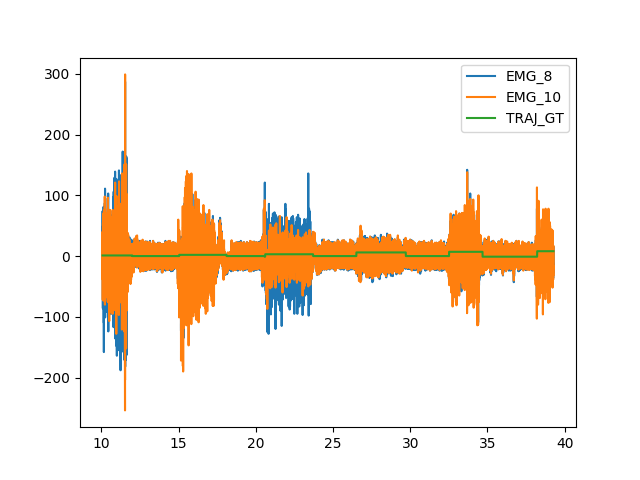

In [178]:
record_1.plot()

In [21]:
record_1 = train[['EMG_8','EMG_10', 'TRAJ_GT']].iloc[50000:200000,:]
record_1.to_hdf('test_signal.hdf','emg')

In [22]:
train = pd.read_hdf('test_signal.hdf')

<IPython.core.display.Javascript object>


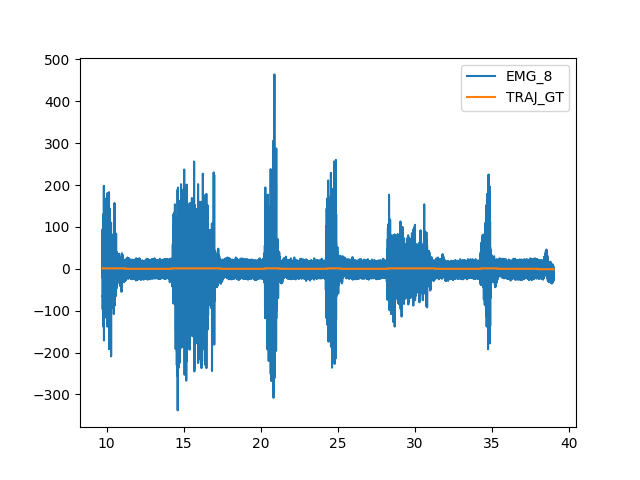

In [23]:
train.loc[:,['EMG_8', 'TRAJ_GT']].plot()
record = train

In [26]:
import math
from numpy.lib.stride_tricks import as_strided
def moving_window_stride(array, window, step):
    """
    Returns view of strided array for moving window calculation with given window size and step
    :param array: numpy.ndarray - input array
    :param window: int - window size
    :param step: int - step lenght
    :return: strided: numpy.ndarray - view of strided array, index: numpy.ndarray - array of indexes
    """
    stride = array.strides[0]
    win_count = math.floor((len(array) - window + step) / step)
    strided = as_strided(array, shape=(win_count, window), strides=(stride*step, stride))
    index = np.arange(window - 1, window + (win_count-1) * step, step)
    return strided, index


In [25]:
def feature_zc(series, window, step, threshold):
    """Zero Crossing"""
    windows_strided, indexes = moving_window_stride(series.values, window, step)
    zc = np.apply_along_axis(lambda x: np.sum(np.diff(x[(x < -threshold) | (x > threshold)] > 0)), axis=1,
                             arr=windows_strided)
    return pd.Series(data=zc, index=series.index[indexes])

def feature_rms(series, window, step):
    """Root Mean Square"""
    windows_strided, indexes = moving_window_stride(series.values, window, step)
    return pd.Series(data=np.sqrt(np.mean(np.square(windows_strided), axis=1)), index=series.index[indexes])

In [30]:
for column in record.filter(regex=r"EMG_\d+"):  # For each column containing EMG data (for each Series)
        print(' ' + column.split('_')[1], end='', flush=True)
#         feature_label = name + '_' + column.split('_')[1]  # Prepare feature column label
        # Call feature calculation by function name, and add to output DataFrame
        feature = feature_rms(record[column], int(500/1000*5120), int(0.1*5120))
#         if isinstance(feature, pd.Series):
#             feature_values[feature_label] = feature
#         elif isinstance(feature, pd.DataFrame):
#             d = {}
#             for c in feature.columns:
#                 d[c] = feature_label + "_" + c
#             feature = feature.rename(columns=d)
#             feature_values = feature_values.join(feature, how='outer')


 8 10

In [185]:
train.iloc[1:3,:].to_dict()

{'EMG_1': {0.3449425271246342: -23.0, 0.34513717538355054: -17.0},
 'EMG_2': {0.3449425271246342: -23.0, 0.34513717538355054: -18.0},
 'EMG_3': {0.3449425271246342: -24.0, 0.34513717538355054: -19.0},
 'EMG_4': {0.3449425271246342: -23.0, 0.34513717538355054: -17.0},
 'EMG_5': {0.3449425271246342: -23.0, 0.34513717538355054: -16.0},
 'EMG_6': {0.3449425271246342: -24.0, 0.34513717538355054: -20.0},
 'EMG_7': {0.3449425271246342: -23.0, 0.34513717538355054: -18.0},
 'EMG_8': {0.3449425271246342: -24.0, 0.34513717538355054: -18.0},
 'EMG_9': {0.3449425271246342: -24.0, 0.34513717538355054: -18.0},
 'EMG_10': {0.3449425271246342: -23.0, 0.34513717538355054: -17.0},
 'EMG_11': {0.3449425271246342: -23.0, 0.34513717538355054: -18.0},
 'EMG_12': {0.3449425271246342: -23.0, 0.34513717538355054: -17.0},
 'EMG_13': {0.3449425271246342: -23.0, 0.34513717538355054: -16.0},
 'EMG_14': {0.3449425271246342: -23.0, 0.34513717538355054: -16.0},
 'EMG_15': {0.3449425271246342: -25.0, 0.3451371753835505

In [121]:
rms = train.loc[:,['EMG_8', 'EMG_9', 'EMG_10', 'EMG_11', 'EMG_12', 'EMG_13', 'EMG_14',  'EMG_15']].rolling(int(0.5*5120)).apply(lambda x: np.sqrt(np.mean(np.square(x))), raw=True)[::int(0.1*5120)]


In [120]:
threshold = 0.1
zc = train.loc[:,['EMG_8', 'EMG_9', 'EMG_10', 'EMG_11', 'EMG_12', 'EMG_13', 'EMG_14',  'EMG_15']].rolling(int(0.5*5120)).apply(lambda x: np.sum(np.diff(x[(x < -threshold) | (x > threshold)] > 0)), raw=True)[::int(0.1*5120)]

In [122]:
y_true = train.loc[:,['TRAJ_GT']].rolling(int(0.5*5120)).apply(lambda x: x[-1], raw=True)[::int(0.1*5120)]

In [73]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [111]:
features = rms.join(zc, rsuffix='zc_', lsuffix = 'rms_')
y_true['TRAJ_GT'].loc[y_true['TRAJ_GT']<0] = np.nan
features = features.join(y_true, rsuffix='_y_true')
features = features.dropna()

In [101]:
features.columns.difference(['TRAJ_GT'])

Index(['EMG_10rms_', 'EMG_10zc_', 'EMG_8rms_', 'EMG_8zc_', 'EMG_9rms_',
       'EMG_9zc_'],
      dtype='object')

In [98]:
features[[features.columns.difference('TRAJ_GT')]]

TypeError: Input must be Index or array-like

In [118]:
y_pred = KMeans(n_clusters=8, random_state=1).fit_predict(features[features.columns.difference(['TRAJ_GT'])])

In [215]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [88]:
from sklearn.metrics import confusion_matrix

In [218]:
np.shape(confusion_matrix(features['TRAJ_GT'], y_pred))==(10,10)

True

In [214]:
np.shape(confusion_matrix(features['TRAJ_GT'], y_pred))

(10, 10)

<IPython.core.display.Javascript object>


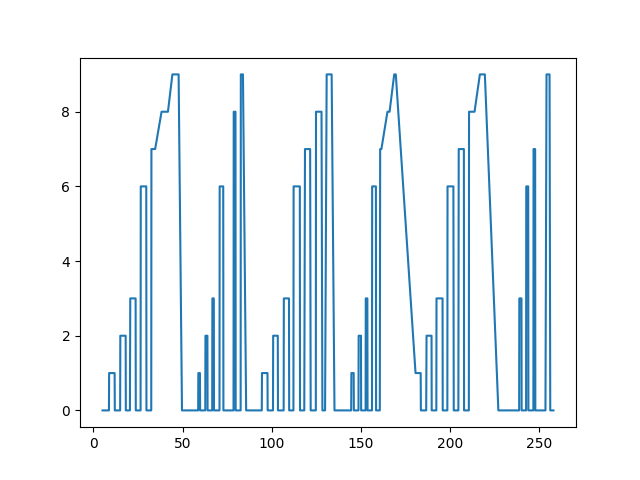

In [112]:
features['TRAJ_GT'].plot()

In [5]:
 pd.read_hdf('test_signal.hdf')

,EMG_8,EMG_10,TRAJ_GT
10.077161,-22.0,-27.0,1.0
10.077355,-24.0,-27.0,1.0
10.077550,-25.0,-26.0,1.0
10.077745,-24.0,-23.0,1.0
10.077939,-21.0,-19.0,1.0
...,...,...,...
39.273426,-21.0,-27.0,8.0
39.273621,-24.0,-27.0,8.0
39.273816,-26.0,-29.0,8.0
39.274010,-27.0,-29.0,8.0


In [13]:
 len(data)/(0.1*5120)

292.96875

In [36]:
# customEval.py
# E. Mendelowitz


    
import numpy as np
import pandas as pd
import scipy.signal as signal
# import numpy as np
from scipy.fftpack import fft, fftfreq

def comment(s):
    '''formats strings to create VPL comments'''
    print('Comment :=>> ' + s)

def grade(num):
    '''formats a number to create a VPL grade'''
    print('Grade :=>> ' + str(num))
    

try:
    import cw6
except:
    comment("unable to import cw5.py")
    grade(0)
    exit()
    
try:
    cw6.rms
    cw6.zc
    cw6.find_threshold
    cw6.norm_emg
    cw6.k_mean
    
except:
    comment("jedna z funkcji nie została zdefiniowana")    
    grade(5)
    exit()
try:    
    comment("Test1: plik cw6.py istnieje")    
#     data = pd.read_hdf('test_signal.hdf')
    data = pd.DataFrame({'EMG_1': np.random.rand(15000),
 'EMG_2': np.random.rand(15000),
 'EMG_3': np.random.rand(15000),
 'EMG_8': np.random.rand(15000),
 'EMG_10': np.random.rand(15000),
 'TRAJ_GT': np.zeros(15000)})
except: 
    comment("wrong input data")   
try:
    feature_rms = cw6.rms(data, window=500, stride=100, fs=5120, columns_emg=['EMG_10', 'EMG_8'])# wartści długości okna i przesunięcia w [ms]
    grade_val = 5
    if len(feature_rms) > len(data)/(0.1*5120)-10 and len(feature_rms) < len(data)/(0.1*5120):
            grade_val = grade_val + 5
            comment("Test2a: Ok rms, akceptowalna długość wyjścia")
            if np.sum(feature_rms.columns == ['EMG_10', 'EMG_8']) == 2:
                comment("Test2b: Ok rms, liczba kolumn")
                grade_val = grade_val + 5
            else:
                 comment("Test2: Nieprawidlowa liczba kolumn na wyjsciu.")
            grade(grade_val)
    else:
        comment("Test2: Nieprawidlowa wartosc na wyjsciu rms")
        grade(grade_val)
except:
    #v = cw5.subsample_emg(a, fs=500, r=3, Rs=50)
    comment("Test2: rms zgłosił błąd")    
    grade(grade_val)

try:
    feature_zc = cw6.zc(data, window=500, stride=100, fs=5120, columns_emg=['EMG_8'])# wartści długości okna i przesunięcia w [ms]
    grade_val = grade_val +5
    if len(feature_zc) > len(data)/(0.1*5120)-10  and len(feature_zc) < len(data)/(0.1*5120):
            grade_val = grade_val + 5
            comment("Test3a: Ok zc, akceptowalna długość wyjścia")
            if np.sum(feature_zc.columns == ['EMG_8']) == 1:
                comment("Test3b: Ok zc, liczba kolumn")
                grade_val = grade_val + 5
            else:
                 comment("Test3: Nieprawidlowa liczba kolumn na wyjsciu.")
            grade(grade_val)
    else:
        comment("Test3: Nieprawidlowa wartosc na wyjsciu zc")
        grade(grade_val)
except:
    #v = cw5.subsample_emg(a, fs=500, r=3, Rs=50)
    comment("Test3: zc zgłosił błąd")    
    grade(grade_val)
    
try:
    threshold = cw6.find_threshold(data, columns_emg=['EMG_10', 'EMG_8'], column_gesture='TRAJ_GT', idle_gesture_id = 0)# wartści długości okna i przesunięcia w [ms]
    grade_val = grade_val +5
    if len(threshold[['EMG_10', 'EMG_8']]) == len(threshold):
            grade_val = grade_val + 5
            comment("Test4: Ok threshold, akceptowalna długość wyjścia")
            
            grade(grade_val)
    else:
        comment("Test4: Nieprawidlowa wartosc na wyjsciu threshold")
        grade(grade_val)
except:
    #v = cw5.subsample_emg(a, fs=500, r=3, Rs=50)
    comment("Test4: threshold zgłosił błąd")    
    grade(grade_val)
    
try:
    norm_coeffs = cw6.rms(data, window=500, stride=100, fs=5120, columns_emg=['EMG_8', 'EMG_10']).max()
    norm_emg = cw6.norm_emg(data, norm_coeffs, columns_emg=['EMG_8', 'EMG_10'])
    grade_val = grade_val +5
    if np.shape(data) == np.shape(norm_emg):
            grade_val = grade_val + 5
            comment("Test5: Ok norm_emg, akceptowalna długość wyjścia")
            
            grade(grade_val)
    else:
        comment("Test5: Nieprawidlowa wartosc na wyjsciu norma_emg")
        grade(grade_val)
except:
    #v = cw5.subsample_emg(a, fs=500, r=3, Rs=50)
    comment("Test5: norm_emg zgłosił błąd")    
    grade(grade_val)
    
    
try:
    norm_coeffs = cw6.rms(data, window=500, stride=100, fs=5120, columns_emg=['EMG_8', 'EMG_10']).max()
    norm_emg = cw6.norm_emg(data, norm_coeffs, columns_emg=['EMG_8', 'EMG_10'])
    grade_val = grade_val+ 5
    if np.shape(data[['EMG_8', 'EMG_10']]) == np.shape(norm_emg):
            grade_val = grade_val + 5
            comment("Test5: Ok norm_emg, akceptowalna długość wyjścia")
            
            grade(grade_val)
    else:
        comment("Test5: Nieprawidlowa wartosc na wyjsciu norma_emg")
        grade(grade_val)
except:
    comment("Blad uruchomienia norm_emg")
try:
    #v = cw5.subsample_emg(a, fs=500, r=3, Rs=50)
    features = feature_rms.join(feature_zc, rsuffix='aa')
    features = features.dropna()
    y_true = data.loc[features.index,'TRAJ_GT']
    y_true[-5:] = 9
 
    cm = cw6.k_mean(features, y_true) 
    grade_val = grade_val + 5
    comment("Test6: Ok k-means, uruchomiony")
    if np.shape(cm) == (10,10):
       grade_val = grade_val + 5
       comment("Test6: Ok k-means, prawidłowy rozmiar macierzy pomyłek")
    grade(grade_val)
except:
    comment("Test6: Failed")

Comment :=>> Test1: plik cw6.py istnieje
Comment :=>> Test2a: Ok rms, akceptowalna długość wyjścia
Comment :=>> Test2b: Ok rms, liczba kolumn
Grade :=>> 15
Comment :=>> Test3a: Ok zc, akceptowalna długość wyjścia
Comment :=>> Test3b: Ok zc, liczba kolumn
Grade :=>> 30
Comment :=>> Test4: Ok threshold, akceptowalna długość wyjścia
Grade :=>> 40
Comment :=>> Test5: Nieprawidlowa wartosc na wyjsciu norma_emg
Grade :=>> 45
Comment :=>> Test5: Ok norm_emg, akceptowalna długość wyjścia
Grade :=>> 55
Comment :=>> Test6: Ok k-means, uruchomiony
Grade :=>> 60


In [33]:
features = feature_rms.join(feature_zc, rsuffix='aa')
features = features.dropna()
y_true = data.loc[features.index,'TRAJ_GT']
y_true[-5:] = 9

cm = cw6.k_mean(features, y_true) 
grade = grade + 5
comment("Test6: Ok k-means, uruchomiony") 

TypeError: unsupported operand type(s) for +: 'function' and 'int'

In [18]:
np.shape(data)


(150000, 3)

In [156]:
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix


def  rms(signal, window=500, stride=100, fs=5120, columns_emg=['EMG_8', 'EMG_9']):# wartści długości okna i przesunięcia w [ms]
    
    return signal[columns_emg].iloc[int(window/1000*fs)::int(stride/1000*fs)]
    
def zc(signal, threshold:float=0.1, window:float=500, stride:float=100, fs=5120, columns_emg=['EMG_8', 'EMG_9']):# wartści długości okna i przesunięci[column columns_emg].iloc[]
    return signal[columns_emg].iloc[int(window/1000*fs)::int(stride/1000*fs)]
    

def find_threshold(signal, columns_emg=['EMG_8', 'EMG_9'], column_gesture='TRAJ_GT', idle_gesture_id = 0):
    return  signal.loc[signal[column_gesture]==idle_gesture_id, columns_emg].mean()

def norm_emg(signal, norm_coeffs, columns_emg=['EMG_8', 'EMG_9']):
    coeffs = norm_coeffs[columns_emg]
    return signal[columns_emg]
    
def k_mean(features, y_true):
    y_pred=y_true
    return  confusion_matrix(y_true, y_pred)



 
    

In [150]:
norm_coeffs = rms(record, window=500, stride=100, fs=5120, columns_emg=['EMG_8', 'EMG_9']).max()

In [157]:
norm_emg(record, columns_emg=['EMG_8', 'EMG_9'], norm_coeffs=norm_coeffs)

,EMG_8,EMG_9
0.344748,-25.0,-25.0
0.344943,-24.0,-24.0
0.345137,-18.0,-18.0
0.345332,-14.0,-13.0
0.345526,-11.0,-11.0
...,...,...
262.748314,-5.0,-5.0
262.748509,-6.0,-5.0
262.748703,-7.0,-5.0
262.748898,-6.0,-4.0


In [189]:
np.random.rand(10)

array([0.6058487 , 0.7163644 , 0.83170777, 0.83676464, 0.36725154,
       0.05129873, 0.34654313, 0.03934173, 0.71727557, 0.35569987])

In [196]:
np.sum(test_sig.columns == ['EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'TRAJ_GT'])

6

In [197]:
def find_threshold(signal, columns_emg=['EMG_8', 'EMG_9'], column_gesture='TRAJ_GT', idle_gesture_id = 0):
    return  signal.loc[signal[column_gesture]==idle_gesture_id, columns_emg].mean()

In [198]:
   threshold = find_threshold(train, columns_emg=['EMG_8', 'EMG_9'], column_gesture='TRAJ_GT', idle_gesture_id = 0)

In [207]:
np.shape(train) == np.shape(train)

True

In [213]:
train.loc[features.index,'TRAJ_GT']

5.128423      0.0
5.228083      0.0
5.327743      0.0
5.427403      0.0
5.527063      0.0
             ... 
257.566972    0.0
257.666632    0.0
257.766292    0.0
257.865952    0.0
257.965612    0.0
Name: TRAJ_GT, Length: 1923, dtype: float64

In [192]:
test_sig = pd.DataFrame({'EMG_1': np.random.rand(10),
 'EMG_2': np.random.rand(10),
 'EMG_3': np.random.rand(10),
 'EMG_4': np.random.rand(10),
 'EMG_5': np.random.rand(10),
 'TRAJ_GT': np.zeros(10)})